<a href="https://colab.research.google.com/github/sowjanyapaluri/srk/blob/main/software_defect_prediction_simple_ml_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prerequisites, Libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

# 2. Data Preparation

In [ ]:
train = pd.read_csv(r'/content/train.csv', index_col = 'id')
test = pd.read_csv(r'/content/test.csv', index_col = 'id')

In [ ]:
print("Train Data")
print(train.shape)
print("Number of rows: "+str(train.shape[0]))
print("Number of columns: "+str(train.shape[1]))

print("---------------------")
print("Test Data")
print(test.shape)
print("Number of rows: "+str(test.shape[0]))
print("Number of columns: "+str(test.shape[1]))

Train Data
(101763, 22)
Number of rows: 101763
Number of columns: 22
---------------------
Test Data
(67842, 21)
Number of rows: 67842
Number of columns: 21


# 3. Exploratory Data Analysis

## 3.1 Data Cleaning

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78
e,101763.0,20853.589876,190571.405427,0.0,564.73,2256.23,10193.24,16846621.12


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  uniq_Op

### 3.1.1 Missing Values

### 3.1.2 Check Inconsistencies

In [ ]:
for col in test.columns:
    print("")
    print(train[col].value_counts())


loc
11.0     3657
12.0     3431
7.0      3426
17.0     3255
8.0      3109
         ... 
220.0       1
313.0       1
806.0       1
264.0       1
230.0       1
Name: count, Length: 378, dtype: int64

v(g)
2.0      22519
1.0      15794
3.0      15555
4.0      10002
5.0       7864
         ...  
66.0         1
83.0         1
262.0        1
117.0        1
77.0         1
Name: count, Length: 106, dtype: int64

ev(g)
1.0      72275
3.0       7143
4.0       5032
5.0       3732
6.0       2723
         ...  
77.0         1
95.0         1
165.0        1
47.0         1
117.0        1
Name: count, Length: 71, dtype: int64

iv(g)
2.0      30315
1.0      27101
3.0      14879
4.0       8630
5.0       5697
         ...  
43.0         1
75.0         1
202.0        1
54.0         1
207.0        1
Name: count, Length: 84, dtype: int64

n
0.0       7835
15.0      1430
22.0      1390
27.0      1383
29.0      1311
          ... 
1231.0       1
373.0        1
866.0        1
1002.0       1
733.0        1
Name

## 3.2 Training-Test Adversial Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score

def adversarial_validation(dataset_1 = train, dataset_2 = test, label = 'Train-Test'):

    adv_train = dataset_1.drop('defects', axis = 1)#[dataset_1.lesion_3 == 0]
    adv_test = dataset_2.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):

        adv_lr = RandomForestClassifier(random_state = 0)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (10, 10))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

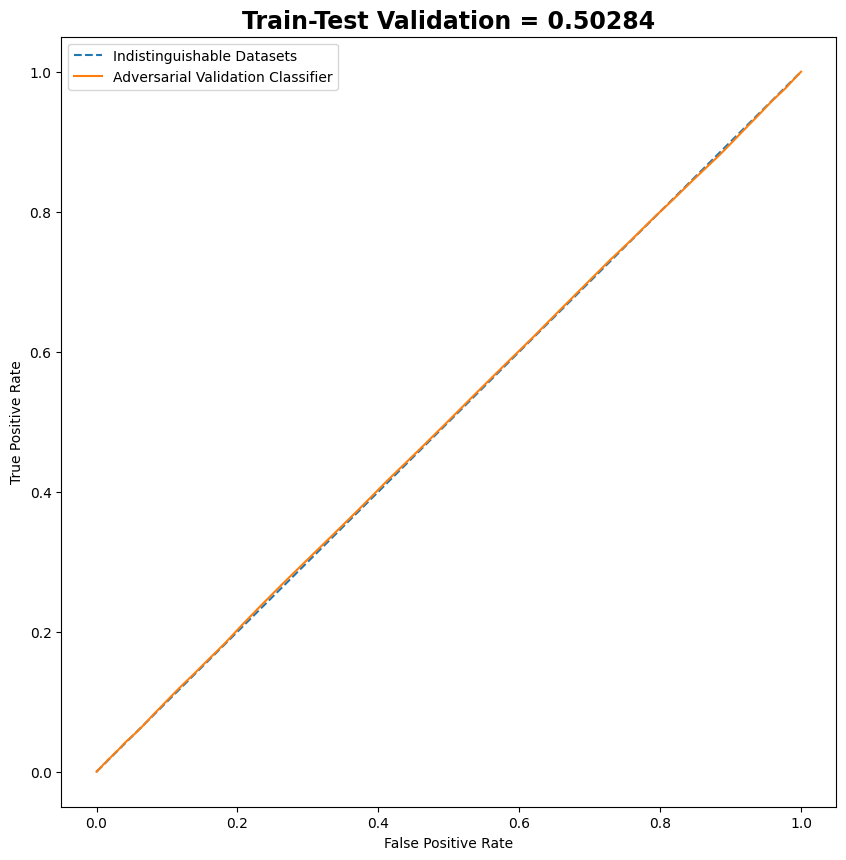

In [ ]:
adversarial_validation()

## 3.3 Data Distribution

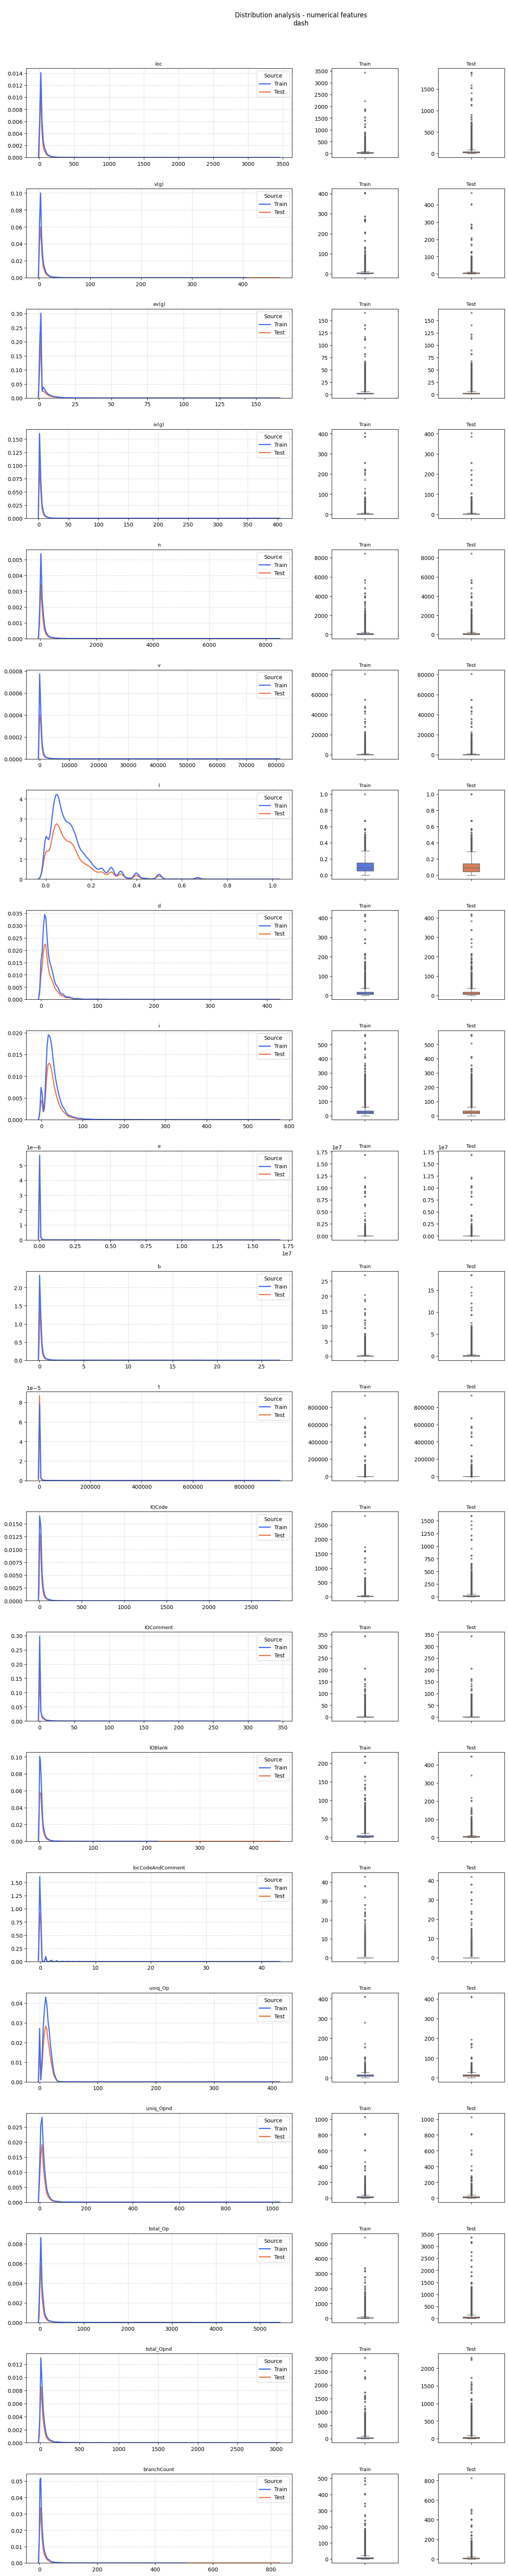

In [ ]:
num = train.select_dtypes(include=['int64','float64']).columns

df = pd.concat([train[num].assign(Source = 'Train'), test[num].assign(Source = 'Test')], ignore_index = True)

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', palette=['#456cf0', '#ed7647'], linewidth = 2.1, warn_singular=False, ax = ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#456cf0', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Train", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Test", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\ndash\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

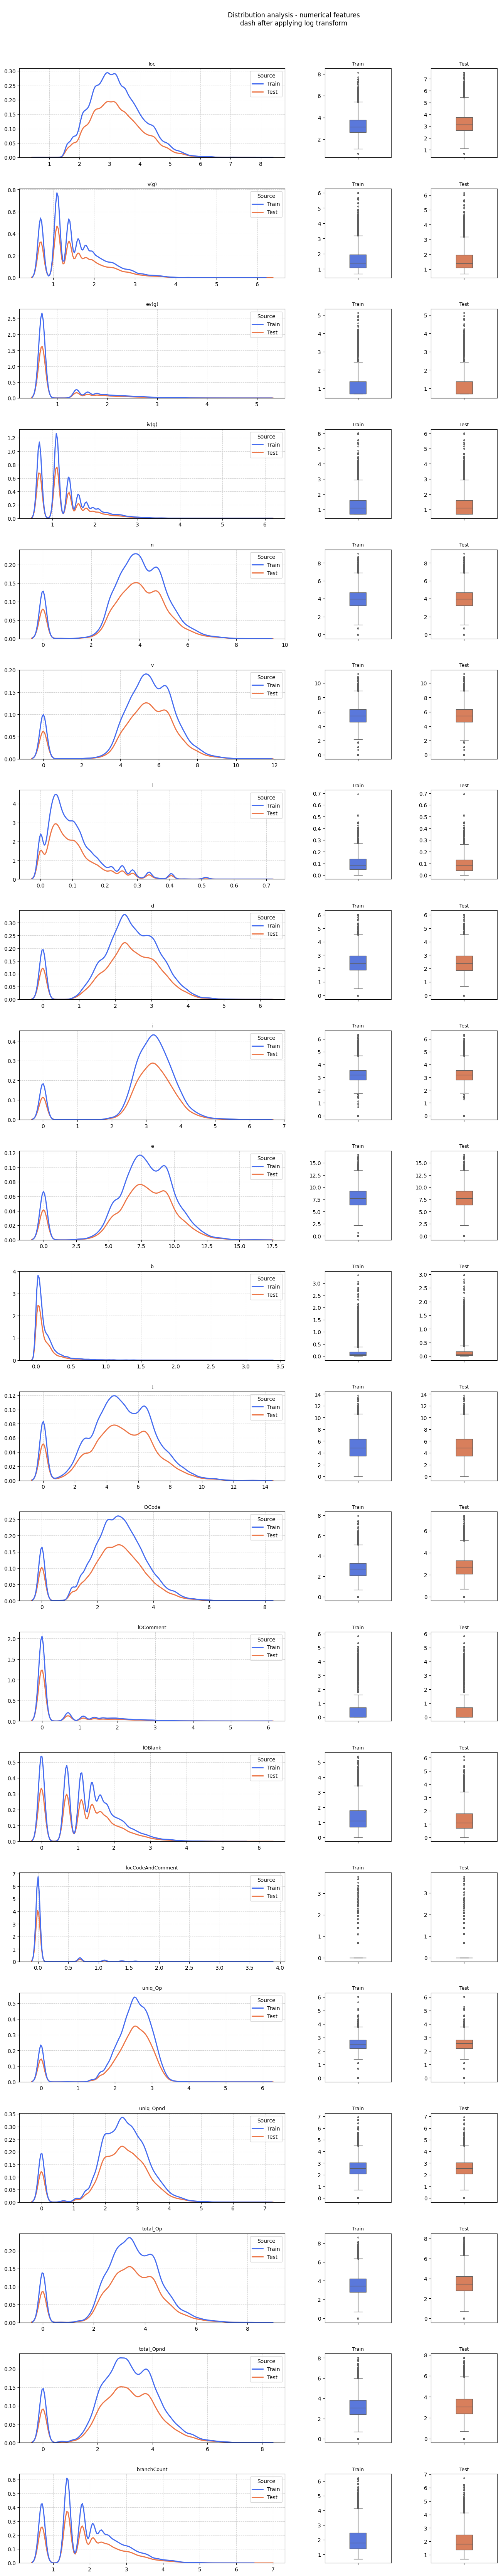

In [ ]:
train_data = train.copy()
test_data = test.copy()

num = train_data.select_dtypes(include=['int64', 'float64']).columns

# Apply the np.log1p transformation to the numeric columns in the concatenated DataFrame
train_data['Source'] = 'Train'
test_data['Source'] = 'Test'
train_data[num] = np.log1p(train[num])
test_data[num] = np.log1p(test[num])

df = pd.concat([train_data, test_data], ignore_index=True)

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', palette=['#456cf0', '#ed7647'], linewidth = 2.1, warn_singular=False, ax = ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#456cf0', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Train", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Test", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\ndash after applying log transform\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

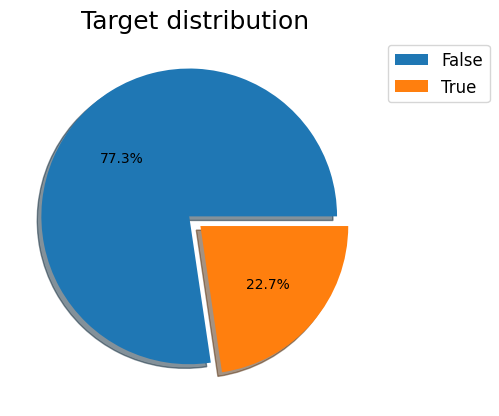

<Figure size 500x1000 with 0 Axes>

In [ ]:
target_dist = train['defects'].value_counts()

plt.pie(target_dist, shadow=True, explode=[.05,.05], autopct='%.1f%%')

plt.title('Target distribution', size=18)
plt.legend(target_dist.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.figure(figsize=(5,10))

plt.show()

## 3.4 Data Transformation

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

num_features = ['loc',
                'v(g)',
                'ev(g)',
                'iv(g)',
                'n',
                'v',
                'l',
                'd',
                'i',
                'e',
                'b',
                't',
                'lOCode',
                'lOComment',
                'lOBlank',
                'locCodeAndComment',
                'uniq_Op',
                'uniq_Opnd',
                'total_Op',
                'total_Opnd',
                'branchCount']

# Create a pipeline to first apply RobustScaler and then MinMaxScaler
preprocessing_pipeline = Pipeline([
    ('log1p_transform', FunctionTransformer(func=np.log1p, validate=False)),
    ('robust_scaling', RobustScaler()),
    ('standard_scaling', StandardScaler())
])

# Create a column transformer using the pipeline for numeric features
transformer = ColumnTransformer(
    transformers=[('num', preprocessing_pipeline, num_features)],
    remainder="passthrough"
)

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('log1p_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('robust_scaling',
                                                  RobustScaler()),
                                                 ('standard_scaling',
                                                  StandardScaler())]),
                                 ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v',
                                  'l', 'd', 'i', 'e', 'b', 't', 'lOCode',
                                  'lOComment', 'lOBlank', 'locCodeAndComment',
                                  'uniq_Op', 'uniq_Opnd', 'total_Op',
                                  'total_Opnd', 'branchCount'])])

# 4. Model Development

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

**User-Defined Functions**

**1. Models Table**

In [ ]:
models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "Precision",
                                     "Recall",
                                     "F1-score",
                                     "Cross-Validated Accuracy",
                                     "Cross-Validated Log Loss",
                                     "Cross-Validated AUC"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC


**2. Train and Evaluate**

In [ ]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test)
    prediction = model.predict(x_test)

    # Calculate accuracy, precision, recall, F1-score, log loss
    test_accuracy = model.score(x_test, y_test)
    train_accuracy = model.score(x_train, y_train)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

     # Perform cross-validation and get predicted probabilities
    cv = 5  # Number of folds for cross-validation
    predicted_probs = cross_val_predict(model, X, Y, cv=cv, method="predict_proba")
    cross_val_accuracy = cross_val_score(model, X, Y, cv=cv, scoring="accuracy").mean()


    # Compute Log Loss
    avg_log_loss = log_loss(Y, predicted_probs[:, 1])


    # Compute AUC
    mean_auc_scores = roc_auc_score(Y, predicted_probs[:, 1])

    # Print the evaluation metrics
    print("---------Debugging---------")
    print("*********Check Overfitting/Underfitting*********")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("*********Evaluating Metric*********")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Cross-Validated Accuracy: {cross_val_accuracy:.4f}")
    print(f"Cross-Validated Log Loss: {avg_log_loss:.4f}")
    print(f"ROC: {mean_auc_scores:.4f}")

    return precision, recall, f1, cross_val_accuracy, avg_log_loss, mean_auc_scores

def model_tab(models_table, model_name, model_alias, model_detail, metrics):
    new_row = {
        "Model": model_name,
        "Model Alias": model_alias,
        "Detail": model_detail,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "F1-score": metrics[2],
        "Cross-Validated Accuracy": metrics[3],
        "Cross-Validated Log Loss": metrics[4],
        "Cross-Validated AUC": metrics[5]
    }

    row_add = pd.DataFrame([new_row])

    models_table = pd.concat([models_table, row_add], ignore_index=True)

    return models_table

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('defects',axis=1)
Y = train['defects'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (91586, 21) (91586,)
Test set: (10177, 21) (10177,)


## 4.1 Logistic Regression (Baseline Model)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
# Create a model pipeline
lor1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LogisticRegression())
])
# Function to train and evaluate the model
metrics = train_evaluate(lor1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics
# Note for Table
model_name = "Logistic Regression"
model_alias = "lor1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8125
Test Accuracy: 0.8136
*********Evaluating Metric*********
Precision: 0.6711
Recall: 0.3492
F1-score: 0.4594
Cross-Validated Accuracy: 0.8125
Cross-Validated Log Loss: 0.4344
ROC: 0.7870
CPU times: user 28.1 s, sys: 452 ms, total: 28.5 s
Wall time: 17.7 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.34922,0.45939,0.812545,0.43444,0.78696


## 4.2 Random Forest Classifier

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Create a model pipeline
rf1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier())
])
# Function to train and evaluate the model
metrics = train_evaluate(rf1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics # Note for Table
model_name = "Random Forest"
model_alias = "rf1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 1.0000
Test Accuracy: 0.8048
*********Evaluating Metric*********
Precision: 0.6197
Recall: 0.3601
F1-score: 0.4555
Cross-Validated Accuracy: 0.8080
Cross-Validated Log Loss: 0.4894
ROC: 0.7689
CPU times: user 5min 43s, sys: 2.78 s, total: 5min 46s
Wall time: 5min 49s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868


## 4.3 Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

# Create a model pipeline
gbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier())
])

# Function to train and evaluate the model
metrics = train_evaluate(gbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8175
Test Accuracy: 0.8135
*********Evaluating Metric*********
Precision: 0.6442
Recall: 0.3969
F1-score: 0.4912
Cross-Validated Accuracy: 0.8150
Cross-Validated Log Loss: 0.4295
ROC: 0.7911
CPU times: user 5min 31s, sys: 571 ms, total: 5min 32s
Wall time: 5min 34s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137


## 4.4 Histogram-Based Gradient Boosting

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

# Create a model pipeline
hgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier())
])

# Function to train and evaluate the model
metrics = train_evaluate(hgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8197
Test Accuracy: 0.8126
*********Evaluating Metric*********
Precision: 0.6439
Recall: 0.3886
F1-score: 0.4847
Cross-Validated Accuracy: 0.8144
Cross-Validated Log Loss: 0.4294
ROC: 0.7913
CPU times: user 20.3 s, sys: 256 ms, total: 20.5 s
Wall time: 20.7 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309


## 4.5 XGBoost

In [ ]:
%%time
from xgboost import XGBClassifier

# Create a model pipeline
xgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier())
])

# Function to train and evaluate the model
metrics = train_evaluate(xgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8430
Test Accuracy: 0.8071
*********Evaluating Metric*********
Precision: 0.6262
Recall: 0.3709
F1-score: 0.4659
Cross-Validated Accuracy: 0.8106
Cross-Validated Log Loss: 0.4369
ROC: 0.7843
CPU times: user 27.5 s, sys: 346 ms, total: 27.9 s
Wall time: 16.6 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335


## 4.6 Light Gradient Boosted Machine

In [ ]:
%%time
from lightgbm import LGBMClassifier

# Create a model pipeline
lgbm1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier())
])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

[LightGBM] [Info] Number of positive: 20756, number of negative: 70830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 91586, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226629 -> initscore=-1.227447
[LightGBM] [Info] Start training from score -1.227447
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] 

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778


# 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## 5.1 GBC

In [ ]:
%%time
# Custom scoring function combining log loss and AUC
def custom_scorer(y, y_pred, model):
    logloss = log_loss(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    return 0.5 * logloss + 0.5 * (1 - auc)  # Combine with equal weight
# Define the hyperparameter grid for GradientBoostingClassifier
gbc_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 6, 8],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0] }
model_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gbc_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=3,
    n_iter=10,
    n_jobs=2,
    verbose=2 )
gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_gbc)
])
gbc2.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 58.5 s, sys: 3.03 s, total: 1min 1s
Wall time: 27min 42s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['loc', 'v(g)', 'ev(g)',
                                                   'iv(g)', 'n', 'v', 'l', 'd',
                                                   'i', 'e', 'b', 't', 'lOCode',
                                                   'lOComment', 'lOBlank',
                                                   'locCo...Comment',
                                                   'uniq_Op', 'uniq_Opnd',
                                                   'total_Op', 'total_Opnd',
                                                   'branchCount'])])),
                ('Model',
                 RandomizedSearchCV(cv=3,
                                    estimator=GradientBoostingClassifier(),
                                    n_jobs=2,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [2, 3, 6,
                                                                       8],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [100,
                                                                          150,
                                                                          200],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='roc_auc', verbose=2))])

## 5.2 HGBC

In [ ]:
%%time
# Define the hyperparameter grid for HistGradientBoostingClassifier
hgbc_param_grid = {
    'max_iter': [50, 100, 150, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_leaf_nodes': [31, 63, 127],  # Maximum number of leaf nodes in each tree
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'l2_regularization': [0.0, 0.1, 0.2, 0.3]  # L2 regularization term for better generalization
}
model_hgbc = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_distributions=hgbc_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=3,
    n_iter=10,
    n_jobs=2,
    verbose=2)
hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_hgbc)
])
hgbc2.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1.86 s, sys: 183 ms, total: 2.04 s
Wall time: 46.3 s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['loc', 'v(g)', 'ev(g)',
                                                   'iv(g)', 'n', 'v', 'l', 'd',
                                                   'i', 'e', 'b', 't', 'lOCode',
                                                   'lOComment', 'lOBlank',
                                                   'locCo...
                                                   'total_Op', 'total_Opnd',
                                                   'branchCount'])])),
                ('Model',
                 RandomizedSearchCV(cv=3,
                                    estimator=HistGradientBoostingClassifier(),
                                    n_jobs=2,
                                    param_distributions={'l2_regularization': [0.0,
                                                                               0.1,
                                                                               0.2,
                                                                               0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'max_iter': [50, 100,
                                                                      150,
                                                                      200],
                                                         'max_leaf_nodes': [31,
                                                                            63,
                                                                            127],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4]},
                                    scoring='roc_auc', verbose=2))])

## 5.3 XGBC

In [ ]:

%%time
# Define the hyperparameter grid for XGBClassifier
xgbc_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.001, 0.01, 0.1],  # Step size shrinkage used in update
    'max_depth': [3, 7, 9],  # Maximum depth of trees
    'min_child_weight': [1, 2, 4],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3]  # L2 regularization term on weights
}

model_xgbc = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=xgbc_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=3,
    n_iter=10,
    n_jobs=2,
    verbose=2,
)

xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_xgbc)
])

xgbc2.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 10.2 s, sys: 157 ms, total: 10.4 s
Wall time: 1min 4s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['loc', 'v(g)', 'ev(g)',
                                                   'iv(g)', 'n', 'v', 'l', 'd',
                                                   'i', 'e', 'b', 't', 'lOCode',
                                                   'lOComment', 'lOBlank',
                                                   'locCo...
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...),
                                    n_jobs=2,
                                    param_distributions={'gamma': [0, 0.1, 0.2,
                                                                   0.3],
                                                         'learning_rate': [0.001,
                                                                           0.01,
                                                                           0.1],
                                                         'max_depth': [3, 7, 9],
                                                         'min_child_weight': [1,
                                                                              2,
                                                                              4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                         'subsample': [0.5, 0.7,
                                                                       1.0]},
                                    scoring='roc_auc', verbose=2))])

## 5.4 LGBM

In [ ]:

%%time
# Define the hyperparameter grid for LGBMClassifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_samples': [1, 2, 4],  # Minimum number of data needed in a leaf
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    'max_bin': [200, 300, 400, 500],
    'num_leaves': [10,20,30,40,50]
}

model_lgbm = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=lgbm_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=3,
    n_iter=10,
    n_jobs=2,
    verbose=2,
)

lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_lgbm)
])

lgbm2.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 20756, number of negative: 70830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 91586, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226629 -> initscore=-1.227447
[LightGBM] [Info] Start training from score -1.227447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['loc', 'v(g)', 'ev(g)',
                                                   'iv(g)', 'n', 'v', 'l', 'd',
                                                   'i', 'e', 'b', 't', 'lOCode',
                                                   'lOComment', 'lOBlank',
                                                   'locCo...
                 RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=2,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_bin': [200, 300,
                                                                     400, 500],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'min_child_samples': [1,
                                                                               2,
                                                                               4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'num_leaves': [10, 20,
                                                                        30, 40,
                                                                        50],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3]},
                                    scoring='roc_auc', verbose=2))])

## 5.5 Random Forest

In [ ]:

%%time
# Define the hyperparameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

model_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=3,
    n_iter=10,
    n_jobs=-1,
    verbose=2,
)

rf2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_rf)
])

rf2.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 18.2 s, sys: 589 ms, total: 18.8 s
Wall time: 4min 18s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['loc', 'v(g)', 'ev(g)',
                                                   'iv(g)', 'n', 'v', 'l', 'd',
                                                   'i', 'e', 'b', 't', 'lOCode',
                                                   'lOComment', 'lOBlank',
                                                   'locCodeAndComment',
                                                   'uniq_Op', 'uniq_Opnd',
                                                   'total_Op', 'total_Opnd',
                                                   'branchCount'])])),
                ('Model',
                 RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                                    n_jobs=-1,
                                    param_distributions={'max_depth': [3, 6, 9],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'max_leaf_nodes': [3,
                                                                            6,
                                                                            9],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          100,
                                                                          150]},
                                    scoring='roc_auc', verbose=2))])

## 5.5 Train Tuned Models

In [ ]:
# printing best parameters
models = [
    ("GBC", gbc_param_grid, model_gbc),
    ("HGBC", hgbc_param_grid, model_hgbc),
    ("XGBC", xgbc_param_grid, model_xgbc),
    ("LGBM", lgbm_param_grid, model_lgbm),
    ("RF", rf_param_grid, model_rf)
]

for model_name, param_grid, model in models:
    print("-" * 30)
    print(model_name)
    try:
        # Print the search grid
        print("Random grid: ", param_grid, "\n")
        # Retrieve the best parameters
        best_params = model.best_params_
        # Print the best parameters
        print("Best Parameters: ", best_params, " \n")
    except NameError:
        print("Parameter grid or model not defined.")
    print("-" * 30)


------------------------------
GBC
Random grid:  {'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [2, 3, 6, 8], 'min_samples_split': [2, 5, 10], 'subsample': [0.8, 0.9, 1.0]} 

Best Parameters:  {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 2, 'learning_rate': 0.1}  

------------------------------
------------------------------
HGBC
Random grid:  {'max_iter': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_leaf_nodes': [31, 63, 127], 'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 4], 'l2_regularization': [0.0, 0.1, 0.2, 0.3]} 

Best Parameters:  {'min_samples_leaf': 4, 'max_leaf_nodes': 63, 'max_iter': 50, 'max_depth': 4, 'learning_rate': 0.1, 'l2_regularization': 0.3}  

------------------------------
------------------------------
XGBC
Random grid:  {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 7, 9], 'min_child_weight': [1, 2, 4], 'gamma': [0

In [ ]:
# Set the best parameters obtained from  hyperparameter tuning

best_param_gbc = {'subsample': 0.8,
                  'n_estimators': 150,
                  'min_samples_split': 5,
                  'max_depth': 3,
                  'learning_rate': 0.1}

best_param_hgbc = {'min_samples_leaf': 1,
                   'max_leaf_nodes': 127,
                   'max_iter': 50,
                   'max_depth': 5,
                   'learning_rate': 0.1,
                   'l2_regularization': 0.3}

best_param_xgbc = {'subsample': 0.5,
                   'reg_lambda': 0.3,
                   'reg_alpha': 0.3,
                   'n_estimators': 150,
                   'min_child_weight': 2,
                   'max_depth': 3,
                   'learning_rate': 0.1,
                   'gamma': 0.3}

best_param_lgbm = {'reg_lambda': 0.0,
                   'reg_alpha': 0.1,
                   'num_leaves': 40,
                   'n_estimators': 150,
                   'min_child_samples': 1,
                   'max_depth': 3,
                   'max_bin': 200,
                   'learning_rate': 0.1}

best_param_rf = {'n_estimators': 150,
                 'max_leaf_nodes': 9,
                 'max_features': None,
                 'max_depth': 6}

In [ ]:
# Only if the hyperparameter tuning is conducted again

#best_param_gbc = **model_gbc.best_params_
#best_param_hgbc = **model_hgbc.best_params_
#best_param_xgbc = **model_xgbc.best_params_
#best_param_lgbm = **model_lgbm.best_params_
#best_param_rf = **model_rf.best_params_


### GBC2

In [ ]:
%%time
# Create a model pipeline
gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier(**best_param_gbc))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(gbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8192
Test Accuracy: 0.8139
*********Evaluating Metric*********
Precision: 0.6481
Recall: 0.3925
F1-score: 0.4889
Cross-Validated Accuracy: 0.8146
Cross-Validated Log Loss: 0.4293
ROC: 0.7914
CPU times: user 6min 51s, sys: 429 ms, total: 6min 51s
Wall time: 6min 56s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427


### HGBC2

In [ ]:
%%time
# Create a model pipeline
hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier(**best_param_hgbc))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(hgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8193
Test Accuracy: 0.8135
*********Evaluating Metric*********
Precision: 0.6475
Recall: 0.3899
F1-score: 0.4867
Cross-Validated Accuracy: 0.8141
Cross-Validated Log Loss: 0.4295
ROC: 0.7911
CPU times: user 18.1 s, sys: 99.6 ms, total: 18.2 s
Wall time: 18.4 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070


### XGBC2

In [ ]:
%%time
# Create a model pipeline
xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(**best_param_xgbc))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(xgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8170
Test Accuracy: 0.8153
*********Evaluating Metric*********
Precision: 0.6553
Recall: 0.3912
F1-score: 0.4900
Cross-Validated Accuracy: 0.8150
Cross-Validated Log Loss: 0.4291
ROC: 0.7920
CPU times: user 28.3 s, sys: 147 ms, total: 28.4 s
Wall time: 16.7 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037


### LGBM2

In [ ]:
%%time
# Create a model pipeline
lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier(**best_param_lgbm))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

[LightGBM] [Info] Number of positive: 20756, number of negative: 70830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 91586, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226629 -> initscore=-1.227447
[LightGBM] [Info] Start training from score -1.227447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843


# RF2

In [ ]:
%%time
# Create a model pipeline
rf2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier(**best_param_rf))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(rf2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Random Forest"
model_alias = "rf2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.8138
Test Accuracy: 0.8124
*********Evaluating Metric*********
Precision: 0.6466
Recall: 0.3813
F1-score: 0.4797
Cross-Validated Accuracy: 0.8135
Cross-Validated Log Loss: 0.4330
ROC: 0.7858
CPU times: user 7min 52s, sys: 505 ms, total: 7min 52s
Wall time: 7min 59s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843


## Voting Ensemble 1

In [ ]:
# Ensemble classifier
estimators1 = [
    ('gbc2', GradientBoostingClassifier(**best_param_gbc)),
    ('hgbc2', HistGradientBoostingClassifier(**best_param_hgbc)),
    ('xgbc2', XGBClassifier(**best_param_xgbc)),
    ('rf2', RandomForestClassifier(**best_param_rf)),
    ('lgbm2', LGBMClassifier(**best_param_lgbm))
              ]

# Create the VotingClassifier with the transformer as a preprocessing step
ensemble1 = VotingClassifier(
    estimators=estimators1,
    voting="soft"
)

# Create a pipeline that applies the transformer and then the ensemble classifier
ve1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('classifier', ensemble1)
])

# Function to train and evaluate the model
metrics = train_evaluate(ve1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)

[LightGBM] [Info] Number of positive: 20756, number of negative: 70830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 91586, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226629 -> initscore=-1.227447
[LightGBM] [Info] Start training from score -1.227447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# Note for Table
model_name = "Voting Ensemble"
model_alias = "ve1"
model_detail = "GBC2+HGBC2+XGBC2+RF2+LGBM2, Scaled, Soft Voting"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843


## Voting Ensemble 2

In [ ]:
choose_model = ['rf2', 'gbc2', 'hgbc2', 'xgbc2', 'lgbm2']

# Filter rows with model aliases in the chosen_aliases list
models_table_ens = models_table[models_table['Model Alias'].isin(choose_model)]

models_table_ens

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843
10,Random Forest,rf2,"Tuned, Scaled",0.646583,0.381282,0.479695,0.813459,0.432970,0.785825


In [ ]:
from numpy import argsort
score_ens = models_table_ens['Cross-Validated AUC'].values
print(score_ens)
print(argsort(argsort(score_ens)))
ranking_ens = 1 + argsort(argsort(score_ens)) # Highest to lowest AUC (descending)
print(ranking_ens)

[0.79142654 0.79106975 0.79203721 0.79184272 0.7858254 ]
[2 1 4 3 0]
[3 2 5 4 1]


In [ ]:
%%time
estimators1 = [
    ('gbc2', GradientBoostingClassifier(**best_param_gbc)),
    ('hgbc2', HistGradientBoostingClassifier(**best_param_hgbc)),
    ('xgbc2', XGBClassifier(**best_param_xgbc)),
    ('lgbm2', LGBMClassifier(**best_param_lgbm)),
    ('rf2', RandomForestClassifier(**best_param_rf))
              ]

# Create the VotingClassifier with the transformer as a preprocessing step
ensemble2 = VotingClassifier(
    estimators=estimators1,
    voting="soft",
    weights=ranking_ens)

# Create a pipeline that applies the transformer and then the ensemble classifier
ve2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('classifier', ensemble2)
])

# Function to train and evaluate the model
metrics = train_evaluate(ve2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)

[LightGBM] [Info] Number of positive: 20756, number of negative: 70830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 91586, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226629 -> initscore=-1.227447
[LightGBM] [Info] Start training from score -1.227447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# Note for Table
model_name = "Voting Ensemble"
model_alias = "ve2"
model_detail = "GBC2+HGBC2+XGBC2+RF2+LGBM2, Scaled, Weighted Soft Voting"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843


# 6. Model Evaluation

In [ ]:
# Filter the DataFrame to include only the relevant columns
plot_table = models_table[['Model Alias','Detail', 'Cross-Validated Accuracy', 'Cross-Validated Log Loss', 'Cross-Validated AUC']]
cross_val_tab = plot_table.sort_values(by='Cross-Validated Accuracy', ascending=True)
log_loss_tab = plot_table.sort_values(by='Cross-Validated Log Loss', ascending=False)
auc_tab = plot_table.sort_values(by='Cross-Validated AUC', ascending=True)

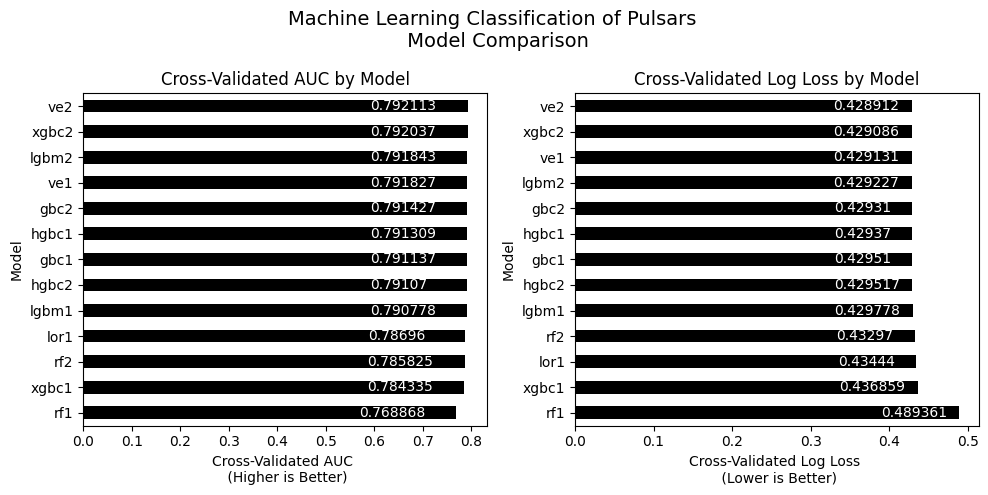

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.671107,0.349220,0.459390,0.812545,0.434440,0.786960
1,Random Forest,rf1,"Default, Scaled",0.619687,0.360052,0.455467,0.807956,0.489361,0.768868
2,Gradient Boosting,gbc1,"Default, Scaled",0.644163,0.396880,0.491153,0.814952,0.429510,0.791137
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.643934,0.388648,0.484734,0.814363,0.429370,0.791309
4,XGBoost,xgbc1,"Default, Scaled",0.626189,0.370884,0.465850,0.810638,0.436859,0.784335
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.641590,0.391681,0.486414,0.813862,0.429778,0.790778
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.648069,0.392548,0.488937,0.814589,0.429310,0.791427
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.647482,0.389948,0.486750,0.814097,0.429517,0.791070
8,XGBoost,xgbc2,"Tuned, Scaled",0.655298,0.391248,0.489962,0.814952,0.429086,0.792037
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.644224,0.393847,0.488841,0.814402,0.429227,0.791843


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the horizontal bar chart for 'Cross-Validated AUC'
ax1 = auc_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated AUC',
    ax=axes[0],
    color='black',
    legend=False  # Remove the legend
)
ax1.set_xlabel('Cross-Validated AUC \n (Higher is Better)')
ax1.set_ylabel('Model')
ax1.set_title('Cross-Validated AUC by Model')

# Annotate the values on the bars for 'Cross-Validated AUC'
for i, (v, detail) in enumerate(zip(auc_tab['Cross-Validated AUC'], auc_tab['Detail'])):
    ax1.text(v - 0.2, i, str(round(v, 6)), va='center', color='white')
    #ax1.text(ax1.get_xlim()[0], i, detail, va='center', ha='left', color='white', fontsize=8)

# Plot the horizontal bar chart for 'Log Loss'
ax2 = log_loss_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated Log Loss',
    ax=axes[1],
    color='black',
    legend=False  # Remove the legend
)
ax2.set_xlabel('Cross-Validated Log Loss \n (Lower is Better)')
ax2.set_ylabel('Model')
ax2.set_title('Cross-Validated Log Loss by Model')

# Annotate the values on the bars for 'Log Loss'
for i, v in enumerate(log_loss_tab['Cross-Validated Log Loss']):
    ax2.text(v - 0.1, i, str(round(v, 6)), va='center', color='white')  # Adjust the position to the left of the bar

# Add a suptitle for the entire figure
plt.suptitle('Machine Learning Classification of Pulsars \n Model Comparison', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

models_table

# 7. Submission

In [ ]:
X_test = pd.read_csv('/content/test.csv', index_col='id')
X_test.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')

In [ ]:
y_prob = ve2.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({'id': X_test.index, 'defects': y_prob})
#submission.to_csv('data/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)
submission.head()


,id,defects
0,101763,0.250349
1,101764,0.193368
2,101765,0.662278
3,101766,0.475650
4,101767,0.146661


# 8. Reference

- https://www.kaggle.com/code/ambrosm/pss3e23-eda-which-makes-sense
- https://machinelearningmastery.com/weighted-average-ensemble-with-python/